## **Snow Prediction Capstone Modeling**

## **Modeling**

### **Overview**
The objective of this step is to:
- Build, evaluate, and select the best model for predicting **Snow Depth**.
- This notebook:
  - Explores two to three models.
  - Applies hyperparameter tuning to optimize model performance.
  - Evaluates models using key performance metrics to determine the most effective solution.


In [4]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna

In [5]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data/preprocessed_data.csv'
snow_data = pd.read_csv(file_path)

In [71]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
print(snow_data.head())


         date  elevation  latitude  longitude  snowdepth  precip_accumulation  \
0  2015-01-01       8790  40.59936 -111.58167       34.0                  9.2   
1  2015-01-02       8790  40.59936 -111.58167       33.0                  9.2   
2  2015-01-03       8790  40.59936 -111.58167       32.0                  9.2   
3  2015-01-04       8790  40.59936 -111.58167       31.0                  9.2   
4  2015-01-05       8790  40.59936 -111.58167       31.0                  9.3   

   precip_increment  airtemp_avg  airtemp_max  airtemp_min  airtemp_obs  \
0               0.0         17.8         28.2         11.3         14.7   
1               0.0         19.6         31.8         13.6         16.5   
2               0.0         19.4         25.5         12.9         21.0   
3               0.1         26.1         34.9         13.3         13.8   
4               0.0         34.3         39.0         30.2         30.9   

   soiltemp_obs  soilmoisture_avg  soilmoisture_max  soilmoist

In [73]:
print(snow_data.dtypes)

date                          object
elevation                      int64
latitude                     float64
longitude                    float64
snowdepth                    float64
precip_accumulation          float64
precip_increment             float64
airtemp_avg                  float64
airtemp_max                  float64
airtemp_min                  float64
airtemp_obs                  float64
soiltemp_obs                 float64
soilmoisture_avg             float64
soilmoisture_max             float64
soilmoisture_min             float64
soiltemp_avg                 float64
soiltemp_max                 float64
soiltemp_min                 float64
7d_airtemp_avg               float64
7d_precip_avg                float64
7d_snowdepth_avg             float64
7d_soiltemp_avg              float64
30d_airtemp_avg              float64
30d_precip_avg               float64
30d_snowdepth_avg            float64
30d_soiltemp_avg             float64
7d_airtemp_std               float64
7

In [6]:
features = snow_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year', 'station_name_Brighton', 'station_name_Dry Fork', 'station_name_Mill-D North']]
target = snow_data['snowdepth']

In [8]:
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#Model 1: Decision Tree Regressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"R² Score: {r2_score(y_test, y_pred_dt)}")

Decision Tree MSE: 21.386970172684457
RMSE: 4.624604866654497
MAE: 2.6664050235478807
R² Score: 0.9659067754344218


In [160]:
# Model 2 : Random Forest
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")

Random Forest MSE: 9.162316169544741
RMSE: 3.026931807878192
MAE: 2.005918367346939
R² Score: 0.9853942423734203


In [189]:
imps = rf_model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X_train.columns[i]}, Importance: {v}")


Feature: elevation, Importance: 0.0005717700820549393
Feature: precip_accumulation, Importance: 0.31141631663944863
Feature: precip_increment, Importance: 0.0006107318768430616
Feature: airtemp_obs, Importance: 0.0022125593745962423
Feature: airtemp_avg, Importance: 0.0023652214139476373
Feature: airtemp_max, Importance: 0.001837669965058157
Feature: airtemp_min, Importance: 0.0018937050088578993
Feature: soiltemp_obs, Importance: 0.0034143241687504726
Feature: soiltemp_avg, Importance: 0.0018138466975166241
Feature: soiltemp_max, Importance: 0.046691998067411054
Feature: soiltemp_min, Importance: 0.0012074002976088178
Feature: soilmoisture_avg, Importance: 0.014384328090736634
Feature: 7d_airtemp_avg, Importance: 0.00319954866721777
Feature: 7d_airtemp_std, Importance: 0.0009670565945829076
Feature: 7d_airtemp_var, Importance: 0.001027708389107936
Feature: 7d_airtemp_sum, Importance: 0.003369415634823707
Feature: 7d_airtemp_median, Importance: 0.0027493686547555296
Feature: 7d_airtemp

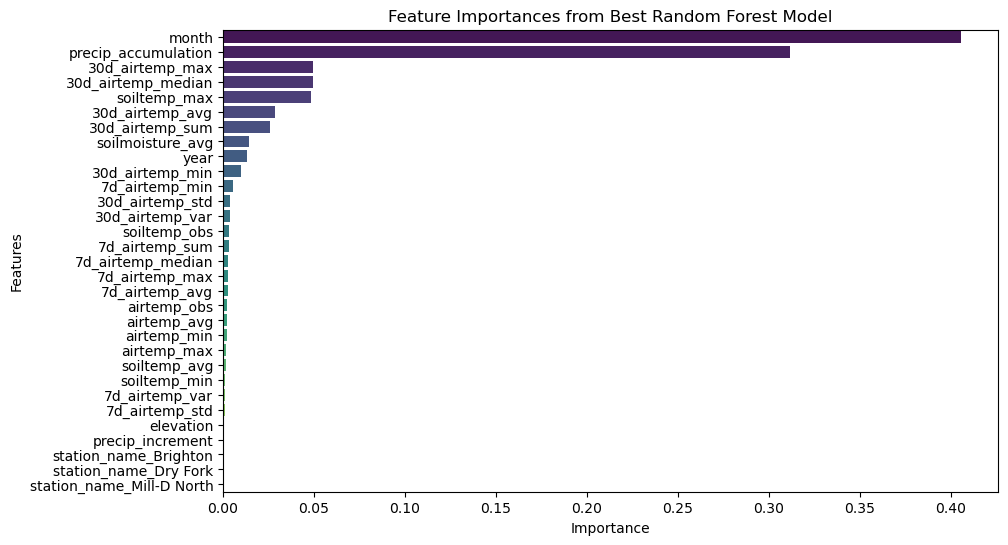

In [340]:
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis", hue='Feature', legend=False)
plt.title('Feature Importances from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Save the plot as an image (e.g., PNG or PDF)
plt.savefig('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Documentation/feature_importance.png', bbox_inches="tight")

# Show the plot
plt.show()

In [111]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [147]:
#Model 3: Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print(f"SVM MSE: {mean_squared_error(y_test, y_pred_svm)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svm))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svm)}")
print(f"R² Score: {r2_score(y_test, y_pred_svm)}")

SVM MSE: 94.64615665135624
RMSE: 9.728625630136882
MAE: 6.4397923906857155
R² Score: 0.8491234313729555


In [21]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

In [164]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

print("Random Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)
print()
print("Support Vector Machine Evaluation:")
evaluate_model(y_test, y_pred_svm)
print()
print("Decision Tree Evaluation:")
evaluate_model(y_test, y_pred_dt)


Random Forest Evaluation:
Mean Squared Error (MSE): 9.16
Root Mean Squared Error (RMSE): 3.03
Mean Absolute Error (MAE): 2.01
R² Score: 0.99

Support Vector Machine Evaluation:
Mean Squared Error (MSE): 94.65
Root Mean Squared Error (RMSE): 9.73
Mean Absolute Error (MAE): 6.44
R² Score: 0.85

Decision Tree Evaluation:
Mean Squared Error (MSE): 21.39
Root Mean Squared Error (RMSE): 4.62
Mean Absolute Error (MAE): 2.67
R² Score: 0.97


Random Forest: 
- Performed well with MSE of **9.16** and R-squared of **0.99**.
- Strong generalization

Support Vector Machine (SVM): 
- Struggled with higher MSE and lower R-squared. 

Decision Tree: 
- Less robust than Random Forest.
- Could be due to overfitting. 

### Fine-tuning hyperparameters 
##### GridSearchCV: 

In [175]:
#Fine-tune hyperparameters
#GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Fixed: Removed 'auto'
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid_rf,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=3)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 10.7871


    With 243 parameter combinations and evaluating each combination on 5 folds of training data the best combination of hyperparameters outputed: 
    - max_depth: None (no limit to tree depth)
    - max_features: None (all features considered at each split),
    - min_samples_leaf: 1 (leaf nodes require at least 1 sample),
    - min_samples_split: 2 (node require at least 2 samples to split)
    - n_estimators: 200 ( number of trees in the forest) 

Having max_depth and max_features remain unrestricted improves the performance of the Random Forest. 
A higher estimator of 200 might improve the stability of predictions.

In [220]:
# Predict using the best model
best_model = grid_search.best_estimator_  # Replace with random_search.best_estimator_ if using RandomizedSearchCV
y_pred_GS = best_model.predict(X_test)

# Evaluate performance
print("Grid Search CV:")
evaluate_model(y_test, y_pred_GS)

Grid Search CV:
Mean Squared Error (MSE): 8.98
Root Mean Squared Error (RMSE): 3.00
Mean Absolute Error (MAE): 1.99
R² Score: 0.99


The slight reduction in MSE compared to the initial model highlights how systematic hyperparameter adjustments enhanced accuracy. Fine-tuning process is effective. 

#### Randomized Search CV

In [170]:

from sklearn.model_selection import RandomizedSearchCV

RANDOM_STATE = 42

param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=RANDOM_STATE),
                                   param_distributions=param_dist_rf,
                                   n_iter=20,  
                                   scoring='neg_mean_squared_error',  
                                   cv=5,  
                                   random_state=RANDOM_STATE,  
                                   n_jobs=-1)  
random_search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_:.4f}")  # Convert negative MSE to positive for readability

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
Best Score: 10.7930


In [213]:
# Predict using the best model from Randomized Search
RS_best_model = random_search.best_estimator_  
RS_y_pred = RS_best_model.predict(X_test)

print("Randomized Search Evaluation:")
print(evaluate_model(y_test, RS_y_pred))

Randomized Search Evaluation:
Mean Squared Error (MSE): 9.01
Root Mean Squared Error (RMSE): 3.00
Mean Absolute Error (MAE): 2.00
R² Score: 0.99
None


The performance is similar to the Grid Search CV, however, showing slightly worse error metrics (higher MSE and MAE). R-sqaured of **0.99** for both models with Randomized Search CV or Grid Search CV indicate the models are highly accurate. 

In [ ]:
#### Bayesian Optimization (optuna)

In [199]:
# Bayesian Optimization (Optuna)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=RANDOM_STATE
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print(f"Best Trial: {study.best_trial}")
print(f"Best Hyperparameters: {study.best_trial.params}")


[I 2025-04-05 17:31:54,329] A new study created in memory with name: no-name-66efa4f6-9071-47b4-8db2-a5af5a63620c
[I 2025-04-05 17:32:02,793] Trial 0 finished with value: 41.794099520586386 and parameters: {'n_estimators': 94, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 0 with value: 41.794099520586386.
[I 2025-04-05 17:32:25,818] Trial 1 finished with value: 10.5163594866683 and parameters: {'n_estimators': 175, 'max_depth': 18, 'min_samples_split': 10}. Best is trial 1 with value: 10.5163594866683.
[I 2025-04-05 17:32:30,841] Trial 2 finished with value: 42.36805809054134 and parameters: {'n_estimators': 72, 'max_depth': 6, 'min_samples_split': 7}. Best is trial 1 with value: 10.5163594866683.
[I 2025-04-05 17:32:47,059] Trial 3 finished with value: 22.276552945331648 and parameters: {'n_estimators': 155, 'max_depth': 8, 'min_samples_split': 10}. Best is trial 1 with value: 10.5163594866683.
[I 2025-04-05 17:33:11,910] Trial 4 finished with value: 10.043904464516514 and pa

Best Trial: FrozenTrial(number=44, state=1, values=[9.028517471696807], datetime_start=datetime.datetime(2025, 4, 5, 17, 49, 43, 900859), datetime_complete=datetime.datetime(2025, 4, 5, 17, 50, 17, 208631), params={'n_estimators': 179, 'max_depth': 19, 'min_samples_split': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=44, value=None)
Best Hyperparameters: {'n_estimators': 179, 'max_depth': 19, 'min_samples_split': 3}


    **Bayesian Optimization** best hyperparameters consists of:
    - n_estimators = 179 (slightly fewer trees than GridSearchCV), 
    - max_depth = 19 (moderate depth to prevent overfitting),
    - min_samples_split = 3 (Must have at least 3 samples to split further).

The objective value [9.0285] reflects the negative mean squared error (MSE) for the trial. This is very close to the other searches and could indicates comparable performance. 

|            | **Grid Search CV**                               | **Bayesian Optimization**                       |
|-------------------------|--------------------------------------------------|------------------------------------------------|
| **Search Strategy**     | Exhaustive search across all parameter combinations. | Probabilistic search using a Gaussian process. |
| **Computation Cost**    | High due to testing all combinations (1215 fits). | Lower as it prioritizes promising regions (44 trials). |
| **Best Parameters**     | `{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}` | `{'n_estimators': 179, 'max_depth': 19, 'min_samples_split': 3}` |
| **Best Score (MSE)**    | ~10.7871                                         | ~9.0285                                         |



In [325]:
final_rf_model = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=RANDOM_STATE
)
final_rf_model.fit(X_train, y_train)
y_pred_final_rf = final_rf_model.predict(X_test)

print("Final Random Forest Regressor with Grid Search CV Best Parameters:")
evaluate_model(y_test, y_pred_final_rf)

Final Random Forest Regressor with Grid Search CV Best Parameters:
Mean Squared Error (MSE): 8.98
Root Mean Squared Error (RMSE): 3.00
Mean Absolute Error (MAE): 1.99
R² Score: 0.99


In [23]:
best_model_2 = RandomForestRegressor(n_estimators=179, max_depth=19, min_samples_split=3, random_state=42)
best_model_2.fit(X_train, y_train)
y_pred_2 = best_model_2.predict(X_test)

print("Final Random Forest Regressor with Bayesian Optimization Best Parameters:")
evaluate_model(y_test, y_pred_2)

Final Random Forest Regressor with Bayesian Optimization Best Parameters:
Mean Squared Error (MSE): 9.03
Root Mean Squared Error (RMSE): 3.00
Mean Absolute Error (MAE): 2.00
R² Score: 0.99


The final evaluation of models show identical performance metrics. Bayesian Optimization required fewer trials compared to the exhaustive approach of Grid Search CV, thus making it potentially more efficient. 

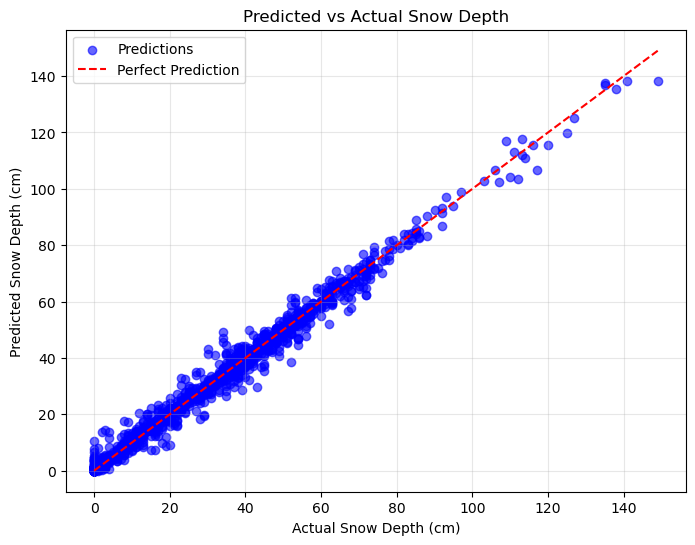

<Figure size 640x480 with 0 Axes>

In [25]:

actual = y_test  # Actual snow depth
predicted = best_model_2.predict(X_test)  # Predicted snow depth

plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, alpha=0.6, color='blue', label="Predictions")
plt.plot([0, max(actual)], [0, max(actual)], color='red', linestyle='--', label="Perfect Prediction")  # 1:1 line
plt.xlabel('Actual Snow Depth (cm)')
plt.ylabel('Predicted Snow Depth (cm)')
plt.title('Predicted vs Actual Snow Depth')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.savefig('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Documentation/predictvactual.png', bbox_inches="tight")

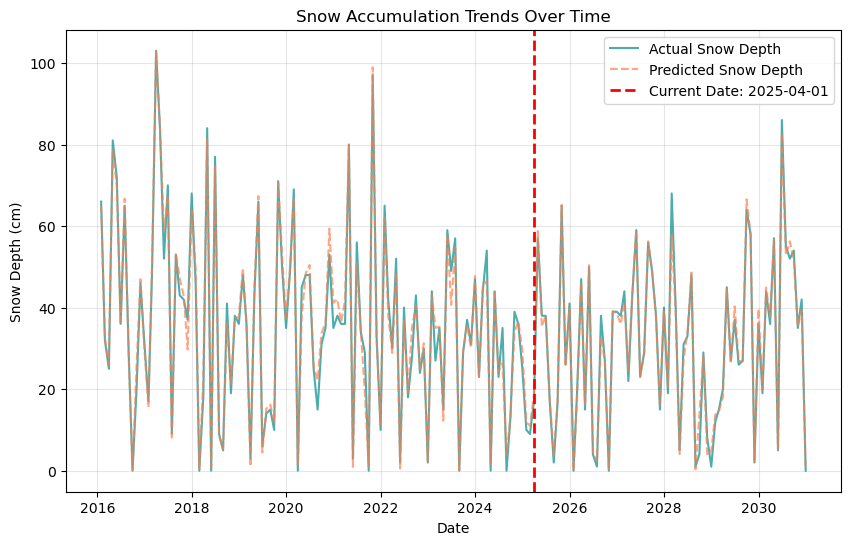

In [65]:
# Specify start and end dates

line_date = datetime.datetime(2025, 4, 1)  
dates = pd.date_range(start='2016-01-01', end='2030-12-31', freq='ME')  

actual_snow = y_test  # Actual snow depth
predicted_snow = best_model_2.predict(X_test)  # Predicted snow depth

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_snow[:len(dates)], label='Actual Snow Depth', color='darkcyan', alpha=0.7)
plt.plot(dates, predicted_snow[:len(dates)], label='Predicted Snow Depth', color='coral', alpha=0.7, linestyle='--')
plt.xlabel('Date')

plt.axvline(x=line_date, color='red', linestyle='--', linewidth=2, label=f"Current Date: {line_date.strftime('%Y-%m-%d')}")
plt.ylabel('Snow Depth (cm)')
plt.title('Snow Accumulation Trends Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Potential Scenarios to explore 
1. Seasonal Trends (Based on "month")
2. Extreme Weather Events (Using "precip_accumulation")
3. Long-term Air Temperature Effects (Using "30d_airtemp_max" and "30d_airtemp_median")
4. Soil Temperature Influences (Using "soiltemp_max")

In [68]:
print("Training Feature Names:")
print(X_train.columns)

Training Feature Names:
Index(['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs',
       'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs',
       'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg',
       '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum',
       '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max',
       '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var',
       '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min',
       '30d_airtemp_max', 'month', 'year', 'station_name_Brighton',
       'station_name_Dry Fork', 'station_name_Mill-D North'],
      dtype='object')


In [70]:
scenario_seasonal_trends = pd.DataFrame({
    'elevation': [8750, 8750],                   # Same elevation
    'precip_accumulation': [50, 5],             # Heavy snowfall in January, light in May
    'precip_increment': [2, 0.5],               # Gradual vs minimal accumulation
    'airtemp_obs': [10, 70],                    # Cold winter, warm summer (in °F)
    'airtemp_avg': [10, 70],
    'airtemp_max': [32, 90],
    'airtemp_min': [-10, 60],
    'soiltemp_obs': [0, 60],                    # Frozen in winter, warm soil in summer
    'soiltemp_avg': [0, 55],
    'soiltemp_max': [10, 65],
    'soiltemp_min': [-10, 50],
    'soilmoisture_avg': [0.7, 0.3],             # Moist soil in winter, dry in summer
    '7d_airtemp_avg': [0, 70],
    '7d_airtemp_std': [2, 5],
    '7d_airtemp_var': [0.4, 1.0],
    '7d_airtemp_sum': [-32, 490],
    '7d_airtemp_median': [-8, 72],
    '7d_airtemp_min': [-10, 65],
    '7d_airtemp_max': [32, 90],
    '30d_airtemp_avg': [-9, 68],
    '30d_airtemp_std': [3, 6],
    '30d_airtemp_var': [0.5, 1.5],
    '30d_airtemp_sum': [-100, 2000],
    '30d_airtemp_median': [-8, 70],
    '30d_airtemp_min': [-11, 64],
    '30d_airtemp_max': [0, 90],
    'month': [1, 5],                            # January vs May
    'year': [2024, 2024],
    'station_name_Brighton': [1, 0],
    'station_name_Dry Fork': [0, 1],
    'station_name_Mill-D North': [0, 0]
})

In [72]:
scenario_extreme_weather = pd.DataFrame({
    'elevation': [8750, 8750],                   # Same elevation
    'precip_accumulation': [100, 1],            # Extreme snowfall vs minimal
    'precip_increment': [5, 0.1],               # Rapid vs slow accumulation
    'airtemp_obs': [15, 35],                    # Cold vs moderate temperature
    'airtemp_avg': [15, 35],
    'airtemp_max': [32, 50],
    'airtemp_min': [-5, 25],
    'soiltemp_obs': [0, 20],                    # Frozen vs thawed soil
    'soiltemp_avg': [2, 22],
    'soiltemp_max': [5, 25],
    'soiltemp_min': [-2, 20],
    'soilmoisture_avg': [0.8, 0.2],             # Saturated vs dry soil
    '7d_airtemp_avg': [0, 34],
    '7d_airtemp_std': [3, 2],
    '7d_airtemp_var': [0.6, 0.4],
    '7d_airtemp_sum': [-30, 238],
    '7d_airtemp_median': [-6, 34],
    '7d_airtemp_min': [-10, 28],
    '7d_airtemp_max': [32, 50],
    '30d_airtemp_avg': [-8, 30],
    '30d_airtemp_std': [4, 3],
    '30d_airtemp_var': [0.7, 0.5],
    '30d_airtemp_sum': [-120, 900],
    '30d_airtemp_median': [-8, 30],
    '30d_airtemp_min': [-12, 25],
    '30d_airtemp_max': [0, 50],
    'month': [12, 4],                           # December (extreme snow) vs April (minimal)
    'year': [2024, 2024],
    'station_name_Brighton': [0, 1],
    'station_name_Dry Fork': [1, 0],
    'station_name_Mill-D North': [0, 0]
})

In [74]:
scenario_air_temp = pd.DataFrame({
    'elevation': [8750, 8750],                   # Same elevation
    'precip_accumulation': [30, 30],            # Same precipitation
    'precip_increment': [2, 2],
    'airtemp_obs': [0, 20],                     # Colder vs warmer air
    'airtemp_avg': [0, 20],
    'airtemp_max': [10, 40],
    'airtemp_min': [-10, 15],
    'soiltemp_obs': [-5, 15],
    'soiltemp_avg': [-3, 17],
    'soiltemp_max': [0, 20],
    'soiltemp_min': [-10, 14],
    'soilmoisture_avg': [0.6, 0.4],             # Slightly moist vs drying soil
    '7d_airtemp_avg': [2, 22],
    '7d_airtemp_std': [1.5, 2.5],
    '7d_airtemp_var': [0.4, 0.6],
    '7d_airtemp_sum': [-20, 210],
    '7d_airtemp_median': [-4, 20],
    '7d_airtemp_min': [-8, 18],
    '7d_airtemp_max': [10, 42],
    '30d_airtemp_avg': [-2, 25],
    '30d_airtemp_std': [2, 5],
    '30d_airtemp_var': [0.5, 1.5],
    '30d_airtemp_sum': [-70, 750],
    '30d_airtemp_median': [-3, 25],
    '30d_airtemp_min': [-5, 22],
    '30d_airtemp_max': [5, 45],
    'month': [3, 5],                            # March vs May
    'year': [2024, 2024],
    'station_name_Brighton': [1, 0],
    'station_name_Dry Fork': [0, 1],
    'station_name_Mill-D North': [0, 0]
})

In [76]:
scenario_soil_temp = pd.DataFrame({
    'elevation': [8750, 8750],                   # Same elevation
    'precip_accumulation': [30, 30],            # Same precipitation
    'precip_increment': [2, 2],                 # Same accumulation rate
    'airtemp_obs': [10, 10],                    # Same air temperature
    'airtemp_avg': [10, 10],
    'airtemp_max': [32, 32],
    'airtemp_min': [-10, -10],
    'soiltemp_obs': [-10, 15],                  # Frozen soil vs warm soil
    'soiltemp_avg': [-9, 16],
    'soiltemp_max': [-5, 20],
    'soiltemp_min': [-15, 10],                  # Minimum soil temperature differs by condition
    'soilmoisture_avg': [0.9, 0.5],             # Saturated vs moderate soil moisture
    '7d_airtemp_avg': [8, 8],                   
    '7d_airtemp_std': [2, 2],                 
    '7d_airtemp_var': [0.4, 0.4],              
    '7d_airtemp_sum': [56, 56],                 
    '7d_airtemp_median': [8, 8],                
    '7d_airtemp_min': [5, 5],                   
    '7d_airtemp_max': [10, 10],                 
    '30d_airtemp_avg': [7, 7],                 
    '30d_airtemp_std': [1.5, 1.5],              
    '30d_airtemp_var': [0.3, 0.3],            
    '30d_airtemp_sum': [210, 210],              
    '30d_airtemp_median': [7, 7],               
    '30d_airtemp_min': [6, 6],                  
    '30d_airtemp_max': [8, 8],                  
    'month': [1, 1],                            
    'year': [2024, 2024],                       
    'station_name_Brighton': [1, 0],           
    'station_name_Dry Fork': [0, 1],            
    'station_name_Mill-D North': [0, 0]        
})

In [78]:

scenarios = {
    "Seasonal Trends": scenario_seasonal_trends,
    "Extreme Weather Events": scenario_extreme_weather,
    "Long-term Air Temperature Effects": scenario_air_temp,
    "Soil Temperature Influences": scenario_soil_temp
}

for name, data in scenarios.items():
    # Ensure input data matches training features
    data = data.reindex(columns=X_train.columns, fill_value=0)

    #predictions
    data['predicted_snow_depth'] = best_model_2.predict(data)

    print(f"--- {name} ---") # readiability
    print(data[['elevation', 'precip_accumulation', 'soiltemp_max', 'predicted_snow_depth']])
    print("\n")  # blank line in between

--- Seasonal Trends ---
   elevation  precip_accumulation  soiltemp_max  predicted_snow_depth
0       8750                   50            10            131.555128
1       8750                    5            65              1.840968


--- Extreme Weather Events ---
   elevation  precip_accumulation  soiltemp_max  predicted_snow_depth
0       8750                  100             5             63.335368
1       8750                    1            25             14.357263


--- Long-term Air Temperature Effects ---
   elevation  precip_accumulation  soiltemp_max  predicted_snow_depth
0       8750                   30             0             93.563687
1       8750                   30            20             35.626638


--- Soil Temperature Influences ---
   elevation  precip_accumulation  soiltemp_max  predicted_snow_depth
0       8750                   30            -5             94.715084
1       8750                   30            20             95.015164




In [80]:
mean_predicted_snowdepth = y_pred_2.mean()

In [82]:
actual_snow_depth_mean = y_test.mean()

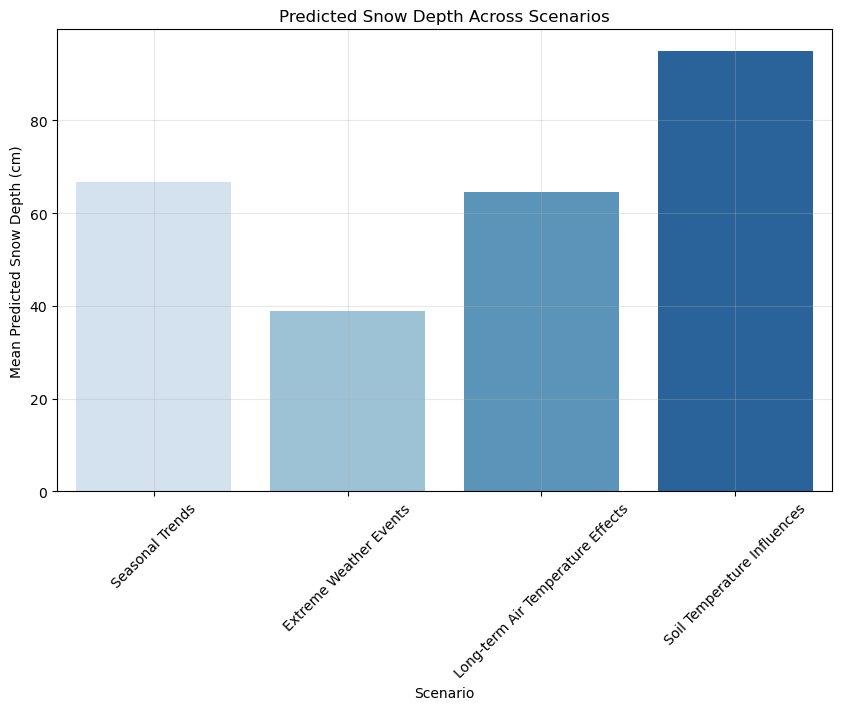

In [353]:
#Visual for scenario
scenario_predictions = []

for name, data in scenarios.items():
    data = data.reindex(columns=X_train.columns, fill_value=0)
    data['predicted_snow_depth'] = best_model_2.predict(data)
    scenario_predictions.append({
        "Scenario": name,
        "Mean Predicted Snow Depth": data['predicted_snow_depth'].mean()
    })

scenario_df = pd.DataFrame(scenario_predictions)

# Bar plot for scenarios
plt.figure(figsize=(10, 6))
sns.barplot(x="Scenario", y="Mean Predicted Snow Depth", data=scenario_df, palette="Blues", hue = "Scenario", legend = False)
plt.title("Predicted Snow Depth Across Scenarios")
plt.ylabel("Mean Predicted Snow Depth (cm)")
plt.xticks(rotation = 45 )
plt.grid(alpha=0.3)
plt.show()

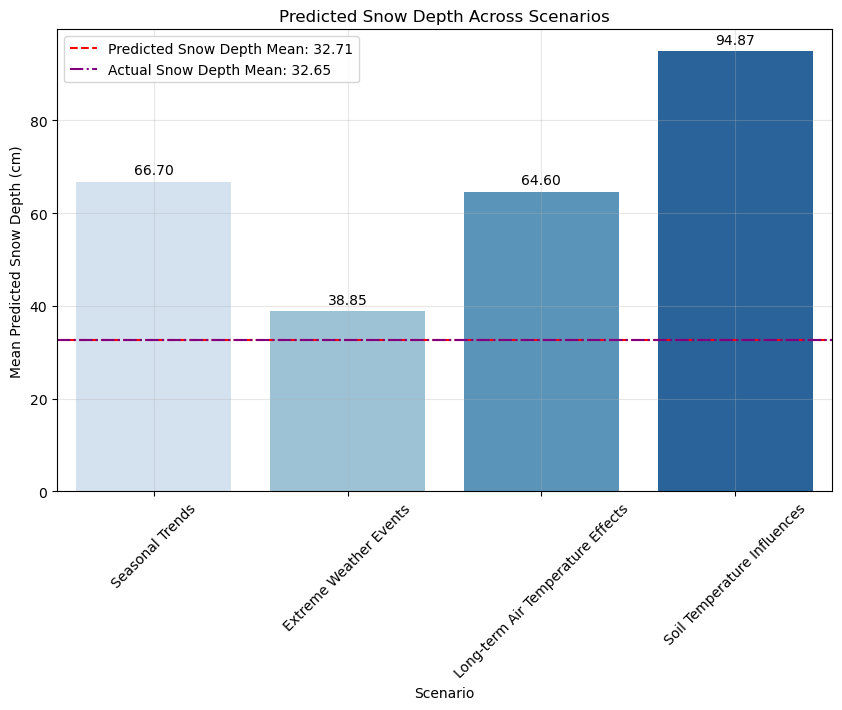

In [96]:
# Visual for scenario
scenario_predictions = []

for name, data in scenarios.items():
    data = data.reindex(columns=X_train.columns, fill_value=0)
    data['predicted_snow_depth'] = best_model_2.predict(data)
    scenario_predictions.append({
        "Scenario": name,
        "Mean Predicted Snow Depth": data['predicted_snow_depth'].mean()
    })

scenario_df = pd.DataFrame(scenario_predictions)

plt.figure(figsize=(10, 6))
sns.barplot(x="Scenario", y="Mean Predicted Snow Depth", data=scenario_df, palette="Blues", hue="Scenario", dodge=False)

plt.axhline(y=mean_predicted_snowdepth, color='red', linestyle='--', label=f"Predicted Snow Depth Mean: {mean_predicted_snowdepth:.2f}")
plt.axhline(y=actual_snow_depth_mean, color='purple', linestyle='-.', label=f"Actual Snow Depth Mean: {actual_snow_depth_mean:.2f}")

for index, row in scenario_df.iterrows():
    plt.text(x=index, y=row['Mean Predicted Snow Depth'] + 1, s=f"{row['Mean Predicted Snow Depth']:.2f}", 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Predicted Snow Depth Across Scenarios")
plt.ylabel("Mean Predicted Snow Depth (cm)")
plt.xticks(rotation=45)
plt.legend(loc='upper left') 
plt.grid(alpha=0.3)
plt.show()